In [1]:
import os
import repackage
from pprint import pprint
from data.microarray_2018_03_21.data import load_data
from spot2intensity.spot2intensity import Spots
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
COLLECTIONS = load_data()

In [3]:
#COLLECTIONS['2018_01_24_slide_21'].

In [4]:
#COLLECTIONS["slide_24"].dump_pickel()


In [5]:
from importlib import reload 
import spot2intensity.spot2intensity as sp
reload(sp)


<module 'spot2intensity.spot2intensity' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/spot2intensity/spot2intensity.py'>

In [6]:
spots = sp.Spots.load_pickel(COLLECTIONS['2018_03_21_slide_30'])
#vars(spots.df.circles.iloc[0])

In [7]:
#vars(spots.df.squares.iloc[0])

In [8]:
spots_all = sp.Spots.load_pickel(COLLECTIONS['2018_03_21_slide_30'])


In [9]:
#spots.df = spots.df[spots.df["circle_qual"] > 0.1]
spots.df["rsd"] = spots_all.df["std_intensities2"]/spots_all.df["intensities2"]

#spots.df = spots.df[(spots.df["rsd"] > 2.0) ]# & (spots.df["circle_qual"] > 0.2)]
frames ={}
for n, d in spots.df.groupby(["Name"]):
    low_bound = d["intensities2"].median()*0.8
    x = d[d["intensities2"] < low_bound]
    frames[n]=x

spots.df = pd.concat(frames)    

spots.df["rsd"] = spots.df["std_intensities2"]/spots.df["intensities2"]
#spots.df = spots.df[(spots.df["rsd"] > 2.0) ]# & (spots.df["circle_qual"] > 0.2)]
spots.df = spots.df[spots.df["circle_qual"] < 0.4]
#low_bound = spots.df["intensities2"].median()*0.7
#spots.df = spots.df[spots.df["intensities2"] > low_bound]

In [10]:
spots_all.df

,Unnamed: 0,Block,Row,Column,Name,circles,intensities,circle_qual,squares,intensities2_b,spot_images,std_intensities2,intensities2
ID,,,,,,,,,,,,,
1,0,1,1,1,LF-0.05,"Circle(xy=(95.5, 110.5), radius=18)",3746510,0.000000,"Rectangle(xy=(57.5, 76.5), width=67, height=59...",0.089216,"[[966, 439, 480, 583, 427, 713, 601, 544, 714,...",1695.247255,964.600980
2,1,1,1,2,LF-0.05,"Circle(xy=(162.5, 109.5), radius=18)",3001509,0.000000,"Rectangle(xy=(124.5, 75.5), width=67, height=5...",0.193137,"[[608, 505, 348, 395, 284, 438, 522, 1115, 400...",2507.398151,700.006863
3,2,1,1,3,LF-0.05,"Circle(xy=(229.5, 109.5), radius=18)",2734714,0.000000,"Rectangle(xy=(191.5, 75.5), width=67, height=5...",0.269608,"[[767, 373, 415, 528, 497, 705, 548, 406, 609,...",2979.382379,780.052941
4,3,1,1,4,LF-0.05,"Circle(xy=(301, 98), radius=9)",2574791,0.250000,"Rectangle(xy=(258.5, 74.5), width=67, height=5...",0.003953,"[[628, 284, 339, 580, 325, 344, 326, 887, 1478...",442.064524,519.387352
5,4,1,1,5,LF-0.05,"Circle(xy=(346, 104), radius=10.8)",2631209,0.375000,"Rectangle(xy=(325.5, 74.5), width=67, height=5...",0.232877,"[[623, 304, 348, 303, 558, 1181, 297, 253, 919...",389.207900,449.909589
6,5,1,1,6,LF-0.05,"Circle(xy=(424, 108), radius=9)",2115359,0.500000,"Rectangle(xy=(393.5, 74.5), width=67, height=5...",1.158103,"[[451, 174, 792, 380, 286, 345, 263, 243, 5817...",846.846710,1294.031621
7,6,1,1,7,LF-0.05,"Circle(xy=(497, 112), radius=9)",2101848,0.343750,"Rectangle(xy=(460.5, 73.5), width=67, height=5...",0.873518,"[[213, 148, 793, 810, 265, 189, 267, 196, 180,...",941.881602,1134.316206
8,7,1,1,8,LF-0.05,"Circle(xy=(548, 103), radius=9)",2527558,0.484375,"Rectangle(xy=(527.5, 73.5), width=67, height=5...",0.636364,"[[351, 488, 348, 380, 347, 304, 354, 249, 213,...",652.798822,689.640316
9,8,1,1,9,LF-0.05,"Circle(xy=(624, 111), radius=9)",2448929,0.484375,"Rectangle(xy=(594.5, 73.5), width=67, height=5...",0.600791,"[[1213, 11481, 1227, 612, 1052, 365, 1251, 805...",2595.907659,778.928854


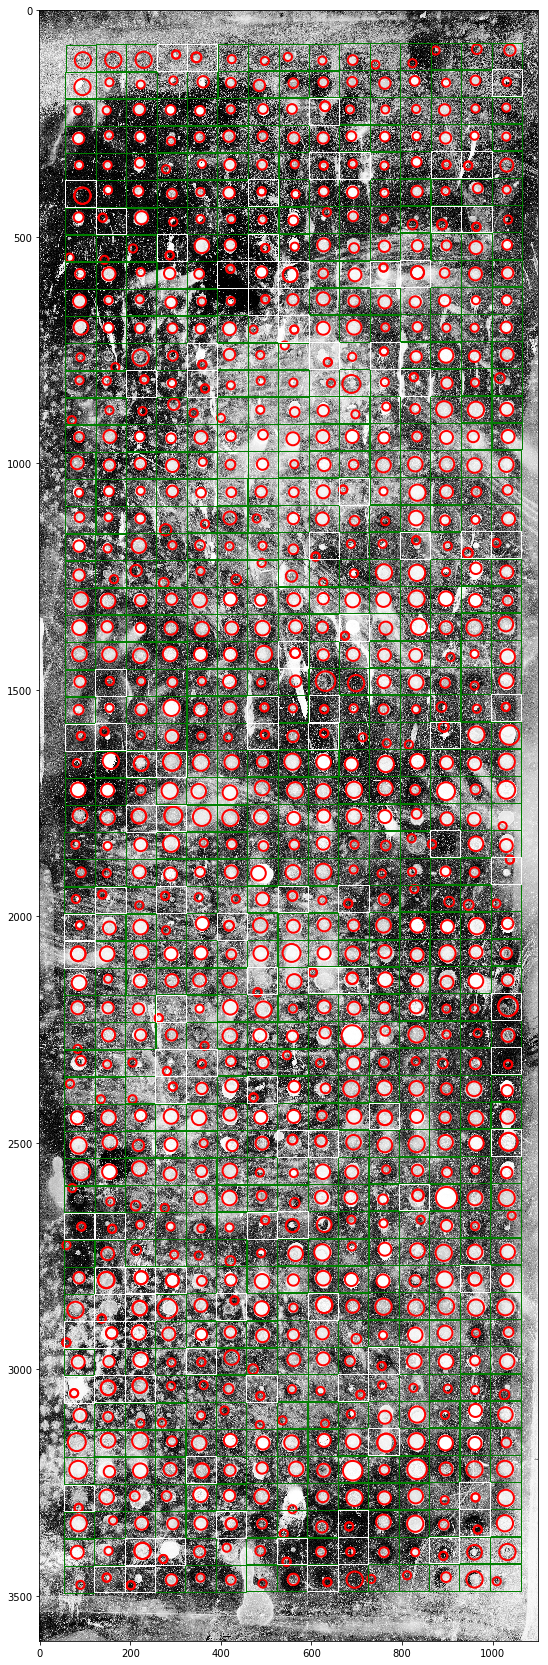

In [14]:
ax = spots_all.plot_grid(figsize=(15,30))
ax = spots.plot_patches(ax=ax,c="w")

plt.show()

In [12]:
#spots.df = spots.df[spots.df["Name"] == "Nenad"]
#display(spots.df)
#spots.df = spots.df[spots.df["circle_qual"] > 0.5]

In [13]:

#spots.plot_grid(figsize = (30,30))
#plt.show()